In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error

submission_df1 = pd.read_excel('submission_file_updated.xlsx', sheet_name='Predictions')
submission_df2 = pd.read_excel('submission_file_updated_fill_na.xlsx', sheet_name='Predictions')
submission_df3 = pd.read_excel('submission_file_updated_class.xlsx', sheet_name='Predictions')
# submission_df4 = pd.read_excel('submission_file_xgboost.xlsx', sheet_name='Predictions')
submission_df4 = pd.read_csv('submission_xgboost2.csv')
column_mapping = {
    'Vehicle Population':'Predictions'
}

submission_df4.rename(columns=column_mapping, inplace=True)
submission_df = (submission_df1+submission_df2+submission_df3+submission_df4)/4


In [41]:
submission_df.head()

,Predictions
0,261684.0825
1,263158.1925
2,269415.8775
3,234481.5175
4,266116.2175


In [42]:
predictions = submission_df['Predictions']  

scoring_df = pd.read_excel('scoring.xlsx')
true_values = scoring_df['Vehicle Population']  

# calculate RMSE
rmse = root_mean_squared_error(true_values, predictions)
print(f'RMSE: {rmse:.2f}')

RMSE: 4109.91


In [56]:
submission_df = 0.1*submission_df1+0.2*submission_df2+0.3*submission_df3+0.4*submission_df4

In [57]:
predictions = submission_df['Predictions']  # 预测值

scoring_df = pd.read_excel('scoring.xlsx')
true_values = scoring_df['Vehicle Population']  # 真实值

# calculate RMSE
rmse = root_mean_squared_error(true_values, predictions)
print(f'RMSE: {rmse:.2f}')

RMSE: 3968.33


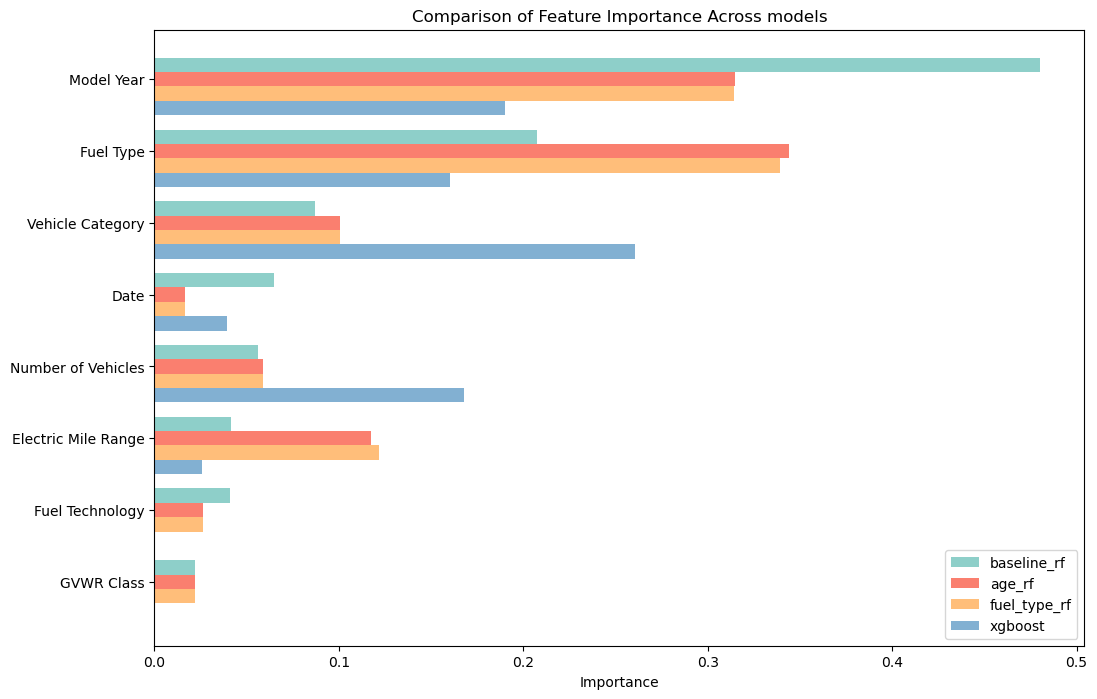

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 统一特征名并整理数据
features_1 = ['Model Year', 'Fuel Type', 'Vehicle Category', 'Date', 'Number of Vehicles', 
              'Electric Mile Range', 'Fuel Technology', 'GVWR Class']
importance_1 = [0.480187, 0.207300, 0.087046, 0.064794, 0.055943, 0.041487, 0.041202, 0.022041]

features_2 = ['Fuel Type', 'Model Year', 'Electric Mile Range', 'Vehicle Category', 'Number of Vehicles', 'Fuel Technology', 'GVWR Class', 'Date']
importance_2 = [0.344023, 0.314537, 0.117266, 0.100629, 0.058834, 0.026141, 0.022151, 0.016419]

features_3 = ['Fuel Type', 'Model Year', 'Electric Mile Range', 'Vehicle Category', 'Number of Vehicles', 'Fuel Technology', 'GVWR Class', 'Date']
importance_3 = [0.339229, 0.314436, 0.122063, 0.100653, 0.058836, 0.026141, 0.022128, 0.016514]

features_4 = ['Fuel Type', 'Model Year', 'Electric Mile Range', 'Vehicle Category', 'Number of Vehicles', 'Fuel Technology', 'GVWR Class', 'Date']
importance_4 = [0.1603, 0.1900, 0.0261, 0.2605, 0.1680, 0.0, 0.0, 0.0396]
# 统一特征，构造一个完整的特征列表（去重）
all_features = list(set(features_1 + features_2 + features_3 + features_4))

# 将每个数据集的特征重要性映射到完整的特征列表上
importance_dict_1 = dict(zip(features_1, importance_1))
importance_dict_2 = dict(zip(features_2, importance_2))
importance_dict_3 = dict(zip(features_3, importance_3))
importance_dict_4 = dict(zip(features_4, importance_4))

importance_1_mapped = [importance_dict_1.get(feature, 0) for feature in all_features]
importance_2_mapped = [importance_dict_2.get(feature, 0) for feature in all_features]
importance_3_mapped = [importance_dict_3.get(feature, 0) for feature in all_features]
importance_4_mapped = [importance_dict_4.get(feature, 0) for feature in all_features]
# 按照第一个数据集的重要性排序
sorted_indices = np.argsort(importance_1_mapped)[::-1]
all_features_sorted = [all_features[i] for i in sorted_indices]
importance_1_sorted = [importance_1_mapped[i] for i in sorted_indices]
importance_2_sorted = [importance_2_mapped[i] for i in sorted_indices]
importance_3_sorted = [importance_3_mapped[i] for i in sorted_indices]
importance_4_sorted = [importance_4_mapped[i] for i in sorted_indices]

# 画图
plt.figure(figsize=(12, 8))
bar_width = 0.2
y_pos = np.arange(len(all_features_sorted))

plt.barh(y_pos - bar_width, importance_1_sorted, height=bar_width, color='#8ECFC9', label='baseline_rf')
plt.barh(y_pos, importance_2_sorted, height=bar_width, color='#FA7F6F', label='age_rf')
plt.barh(y_pos + bar_width, importance_3_sorted, height=bar_width, color='#FFBE7A', label='fuel_type_rf')
plt.barh(y_pos + 2*bar_width, importance_4_sorted, height=bar_width, color='#82B0D2', label='xgboost')

plt.xlabel('Importance')
plt.title('Comparison of Feature Importance Across models')
plt.yticks(y_pos, all_features_sorted)
plt.legend()
plt.gca().invert_yaxis()  
plt.show()
